In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
paragraph = """The COVID-19 pandemic in India is part of the worldwide pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first case of COVID-19 in India, which originated from China, was reported on 30 January 2020. 
            India currently has the largest number of confirmed cases in Asia,[8] and has the third highest number of confirmed cases in the world after the United States and Brazil[9] with the number of total confirmed cases breaching the 100,000 mark on 19 May, 200,000 on 3 June, [10][11] and 1,000,000 confirmed cases on 17 July 2020.
            India's case fatality rate is among the lowest in the world at 2.41% as of 23 July and is steadily declining.
            Six cities account for around half of all reported cases in the country – Mumbai, Delhi, Ahmedabad, Chennai, Pune and Kolkata. As of 24 May 2020, Lakshadweep is the only region which has not reported a case. 
            India's recovery rate stands at 63.18% as on 23 July 2020.
            On 10 June, India's recoveries exceeded active cases for the first time.
            On 22 March, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi. 
            It was followed by mandatory lockdowns in COVID-19 hotspots and all major cities. Further, on 24 March, the Prime Minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion-person population of India. On 14 April, India extended the nationwide lockdown till 3 May which was followed by two-week extensions starting 3 and 17 May with substantial relaxations. 
            From 1 June, the government started "unlocking" the country (barring "containment zones") in three unlock phases.
            In March, after the lockdown was imposed, the United Nations (UN) and the World Health Organization (WHO) praised India's response to the pandemic as 'comprehensive and robust,' terming the lockdown restrictions as 'aggressive but vital' for containing the spread and building necessary healthcare infrastructure. At the same time, the Oxford COVID-19 Government Response Tracker (OxCGRT) noted the government's swift and stringent actions, emergency policy-making, emergency investment in health care, fiscal stimulus, investment in vaccine and drug R&D and gave India a score of 100 for the strict response. Also in March, Michael Ryan, chief executive director of the WHO's health emergencies programme noted that India had tremendous capacity to deal with the outbreak owing to its vast experience in eradicating smallpox and polio.[20][21][22] Other commentators have raised concerns about the economic fallout arising as a result of the pandemic and preventive restrictions.[23][24] The lockdown was justified by the government and other agencies for being preemptive to prevent India from entering a higher stage which could make handling very difficult and cause even more losses thereafter.
            In Rajasthan, a combination of anti-malaria, anti-swine flu and anti-HIV drugs resulted in the recovery of three patients in March.In the same month, the Indian Institute of Chemical Technology, the Council of Scientific and Industrial Research (CSIR) and Cipla launched a joint venture to develop anti-COVID-19 drugs.
            Another Indian firm, Stempeutics, announced plans to introduce a stem cell-based agent for treating critical COVID-19 patients. 
            Following randomised clinical trials, another Indian firm Biocon got its novel biologic therapy by use of a newly formulated intravenous drug for treatment of patients.
            In March, a startup incubated in Pune's SciTech Park introduced 'Airon', a negative ion generator capable of reducing a room's viral load by 99.7%.In April, funds for a number of preventive agents were released to initiate research.
            On 23 March, the National Task Force for COVID-19 constituted by the ICMR recommended the use of hydroxychloroquine for the treatment of high-risk cases
            On 20 March, Maharashtra government cancelled examinations for class 1 to 8 and promoted the students to the next classes, whereas examinations for class 9 and 11 were postponed till 15 April.
            Madhya Pradesh Board of Secondary Education postponed board exams for class 10 and 12 and asked school principals to promote or detain students of class 5 to 8 based on their performance in previous terms.
            Board exams of class 10 and 12 were postponed in Kerala.
            Assam government cancelled all exams till 31 March.
            The Union Public Service Commission also postponed the interview for the Civil Services Examination 2019 to be held from 23 March to 3 April.
            The SSC exams in Tamil Nadu and Puducherry were postponed to 15 April.
            On 2 March, the BSE SENSEX witnessed a flash crash on the back of Union Health Ministry's announcement of two new confirmed cases.
            A UN report estimated a trade impact of US$348 million on India due to the outbreak, making India one of the 15 worst affected economies across the world.
            Asian Development Bank estimated that the outbreak could cause losses of up to US$29.9 billion to India's economy.
            On 9 March, The BSE SENSEX closed 1,942 points lower at 35,635 while the NSE NIFTY 50 was down by 538 points to 10,451.
            The International Indian Film Academy Awards, planned to take place on 27 March, was cancelled.
            Cinema halls were shut down by most state governments. 
            Film bodies decided to stop the production of films, TV shows and web series till 31 March.
            On 25 March, all video streaming services, jointly decided to offer only SD quality content on cellular networks. 
            They also decided to lower the resolution to 480p to lower the stress on telecom networks throughout the 21-day lockdown during which there would be an unprecedented surge in mobile internet consumption since people were confined to their homes.
            The Indian Broadcasting Foundation (IBF) said that four major broadcasting networks in the country have decided to waive all fees for four channels for two months. 
            The IBF is an organisation promoting the Indian television industry. 
            In a statement, the foundation said that Sony Pal, run by Sony, Star Utsav, run by Star India, Viacom18's Colors Rishtey run by colours and Zee Anmol run by Zee TV will be available for two months free to all viewers in the country. 
            This offer is for all DTH and cable networks."""

In [3]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PINTU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['the covid- pandemic in india is part of the worldwide pandemic of coronavirus disease (covid- ) caused by severe acute respiratory syndrome coronavirus (sars-cov- ).',
 'the first case of covid- in india, which originated from china, was reported on january .',
 'india currently has the largest number of confirmed cases in asia, and has the third highest number of confirmed cases in the world after the united states and brazil with the number of total confirmed cases breaching the , mark on may, , on june, and , , confirmed cases on july .',
 "india's case fatality rate is among the lowest in the world at .",
 '% as of july and is steadily declining.',
 'six cities account for around half of all reported cases in the country – mumbai, delhi, ahmedabad, chennai, pune and kolkata.',
 'as of may , lakshadweep is the only region which has not reported a case.',
 "india's recovery rate stands at .",
 '% as on july .',
 "on june, india's recoveries exceeded active cases for the first time.

In [7]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [8]:
sent_word

[['the',
  'covid-',
  'pandemic',
  'in',
  'india',
  'is',
  'part',
  'of',
  'the',
  'worldwide',
  'pandemic',
  'of',
  'coronavirus',
  'disease',
  '(',
  'covid-',
  ')',
  'caused',
  'by',
  'severe',
  'acute',
  'respiratory',
  'syndrome',
  'coronavirus',
  '(',
  'sars-cov-',
  ')',
  '.'],
 ['the',
  'first',
  'case',
  'of',
  'covid-',
  'in',
  'india',
  ',',
  'which',
  'originated',
  'from',
  'china',
  ',',
  'was',
  'reported',
  'on',
  'january',
  '.'],
 ['india',
  'currently',
  'has',
  'the',
  'largest',
  'number',
  'of',
  'confirmed',
  'cases',
  'in',
  'asia',
  ',',
  'and',
  'has',
  'the',
  'third',
  'highest',
  'number',
  'of',
  'confirmed',
  'cases',
  'in',
  'the',
  'world',
  'after',
  'the',
  'united',
  'states',
  'and',
  'brazil',
  'with',
  'the',
  'number',
  'of',
  'total',
  'confirmed',
  'cases',
  'breaching',
  'the',
  ',',
  'mark',
  'on',
  'may',
  ',',
  ',',
  'on',
  'june',
  ',',
  'and',
  ',',


In [9]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [10]:
sent_word

[['covid-',
  'pandemic',
  'india',
  'part',
  'worldwide',
  'pandemic',
  'coronavirus',
  'disease',
  '(',
  'covid-',
  ')',
  'caused',
  'severe',
  'acute',
  'respiratory',
  'syndrome',
  'coronavirus',
  '(',
  'sars-cov-',
  ')',
  '.'],
 ['first',
  'case',
  'covid-',
  'india',
  ',',
  'originated',
  'china',
  ',',
  'reported',
  'january',
  '.'],
 ['india',
  'currently',
  'largest',
  'number',
  'confirmed',
  'cases',
  'asia',
  ',',
  'third',
  'highest',
  'number',
  'confirmed',
  'cases',
  'world',
  'united',
  'states',
  'brazil',
  'number',
  'total',
  'confirmed',
  'cases',
  'breaching',
  ',',
  'mark',
  'may',
  ',',
  ',',
  'june',
  ',',
  ',',
  ',',
  'confirmed',
  'cases',
  'july',
  '.'],
 ['india', "'s", 'case', 'fatality', 'rate', 'among', 'lowest', 'world', '.'],
 ['%', 'july', 'steadily', 'declining', '.'],
 ['six',
  'cities',
  'account',
  'around',
  'half',
  'reported',
  'cases',
  'country',
  '–',
  'mumbai',
  ',',
 

In [11]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)

#create corpus/dictionary of words
words = model.wv.vocab

In [13]:
# Test the word vectors
vector = model.wv['postponed']

print(vector)

[ 2.95968307e-03 -9.51232141e-05  2.43017729e-03 -3.59272322e-04
 -2.89545045e-03  1.00908312e-03 -1.97360036e-03  4.92721284e-03
 -2.86742905e-03  2.98234355e-03  3.36440769e-03  1.78377249e-03
  4.40427987e-03 -4.21006139e-03 -4.84033627e-03  2.15658499e-03
 -4.18123603e-03  4.32520453e-03 -2.14119791e-03 -1.68586103e-03
  4.51150211e-03 -1.23952015e-03  1.63652713e-03  3.21186497e-03
 -2.48204614e-03 -1.20325174e-04 -3.50309443e-03  2.58989143e-03
 -3.49354302e-03 -3.85265402e-03 -1.10280712e-03 -4.80108988e-03
 -4.13771067e-03 -2.16770102e-03 -1.76729495e-03 -4.19564731e-03
 -3.88196181e-03  2.04840861e-03 -4.05363273e-03 -4.95446438e-04
 -2.44735577e-03 -3.82564985e-03 -3.29441787e-03  5.35545478e-05
  4.96151717e-03  3.20547284e-03 -2.25193123e-03  2.10768636e-03
  4.72419010e-03  4.27119341e-03 -3.06634977e-03  4.74205473e-04
 -4.50322824e-03  3.87118733e-03  4.24833689e-03  5.89882140e-04
 -2.81984778e-03  5.32184087e-04 -3.57004208e-03 -4.49497532e-03
  2.14373972e-03  5.47542

In [18]:
# Most similar words
similar = model.wv.most_similar('outbreak',topn=3)

similar

[('billion-person', 0.2880357503890991),
 ('preventive', 0.27058690786361694),
 ('affected', 0.2668914794921875)]

C:\Users\PINTU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


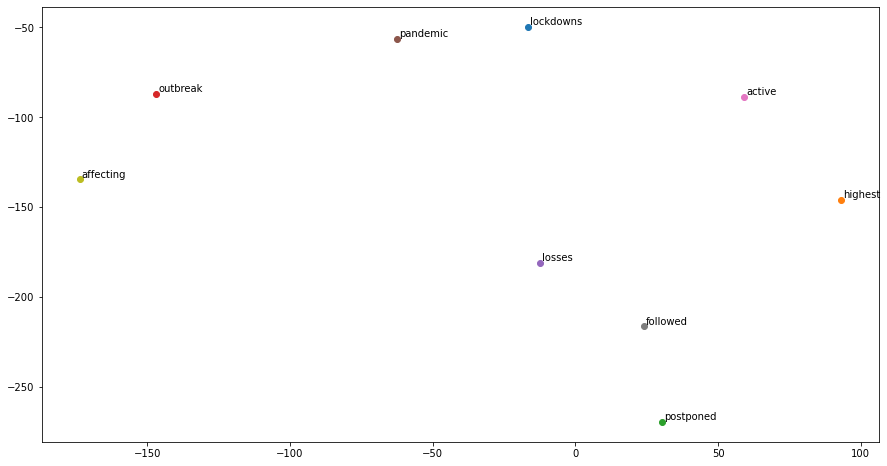

In [27]:
from sklearn.manifold import  TSNE
vocab = ['lockdowns','highest','postponed','outbreak','losses','pandemic','active','followed','affecting']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)